# Honey, they're Disappearing!
## An analysis of bee colony loss from 2010-2016 in the United States

### Capstone Analytic Report and Research Proposal -- Thinkful
### HC 2019-02-16

With the rise in uncontrolled bee deterrents such as insecticides, mites, and other pathogenic diseases, beekeeping has become unpopular over the past few decades in the US(Ellis et al., 2010; Potts et al., 2010; Morse, 2000). This trend is demonstrated by data collected from 2010-2016 on managed honey bee (Apis mellifera L.) colonies. Decline in honey beekeeping not only impacts agricultural communities economically, but also affects the pollination of many essential plants (Neumann & Carreck, 2010). The negative impacts of colony decline on the community and the pressure it places on the ecosystem have pushed the issue to the forefront of public attention, now popularly termed "Colony Collapse Disorder" (CCD)*. However, with the popularity of the problem, there has been widespread misinformation about the causes and effects of bee colony loss (Neumann & Carreck, 2010). However, a study done in 2009 by vanEngelsdorp and Meixner have shown that colony loss is not an uncommon occurence. This historical decline was found to be caused by a viral infection, named “Isle of Wight Disease” (Bailey and Ball, 1991; Bailey, 2002).

Though a closer examination of this [dataset](https://bip2.beeinformed.org/hive-scales/config/about) provided by The Bee Informed Partnership (BIP) may not explain why bee colonies have been declining, it can help us better understand the relationship between beekeeping and bee colony health. 

(The BIP was initially funded by the United States Department of Agriculture (USDA) and the National Institute of Food and Agriculture (NIFA) but has now become non-for-profit organization that works with beekeepers nationally to promote the health of bees.)

**Note: CCD is a term only used for HONEY bees (Genus: Apis). It does not apply to other bees such as bumblebees (Genus: Bombus), sweat bees (Genus: Lasioglossum), and many others.*

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats
import mpl_toolkits
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.basemap import Basemap  
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
#import dataset
df=pd.read_csv('Bee_Colony_Loss.csv')
maps=pd.read_csv('statelatlong.csv')

### Metadata:
   - YEAR: year of bee survey
   - SEASON: season survey was taken (all were annual surveys)
   - STATE: state that bee survey was taken
   - TOTAL_ANN_LOSS: estimate of the number of colonies lost by the whole beekeeping population in that state
   - BEEKEEPERS: number of beekeepers
   - STATE_BEEKEEPERS: percent of beekeepers who do NOT keep bees in more than one state
   - COLONIES: number of colonies
   - STATE_COLONIES: percent of colonies that span only one state

In [3]:
#Creating new dataframe with desired columns; grouped by state
df1 = df[['YEAR','STATE','BEEKEEPERS','COLONIES','TOTAL_ANN_LOSS']]
df1=df1[df1.STATE != 'MultiStateOperation']
df2=df1.groupby('STATE').mean().reset_index().dropna()

Taking a closer look at the average loss per state, we see that the District of Columbia and Iowa have the highest rate of loss over the six-year period. Oklahoma and Pennsylvania also have high rates of colony loss, while Hawaii and Montana have the lowest rates of colony loss. However, figure 1a does not take into account the number of colonies that each beekeeper must care for per state. Therefore, figure 1b demonstrates the number of colonies each beekeeper is responsible for per state. After normalizing the number of colonies and beekeepers, the ratio can be assumed to be the number of colonies per beekeeper. Therefore, a higher ratio indicates more colonies per beekeeper. We see a few stand out states with extremely high ratios: Mississippi, North Dakota, South Dakota, and Nebraska. These states also tend toward the east of the country. According to the [USDA](https://www.nass.usda.gov/Surveys/Guide_to_NASS_Surveys/Bee_and_Honey/), North Dakota and South Dakota are the top two honey-producing states, which accounts for their high colony to beekeeper ratio. 

The data grouped by state did not suggest much, so a deeper look at loss over years may tell us which years to focus on. 

Text(0.12, -0.1, 'Figure 1: a. The District of Columbia and Iowa have the highest rate of loss while Hawaii and Montana have the lowest rates of colony loss.\n b. Mississippi, North Dakota, South Dakota, and Nebraska stand out as the highest colony:beekeeper ratio. ')

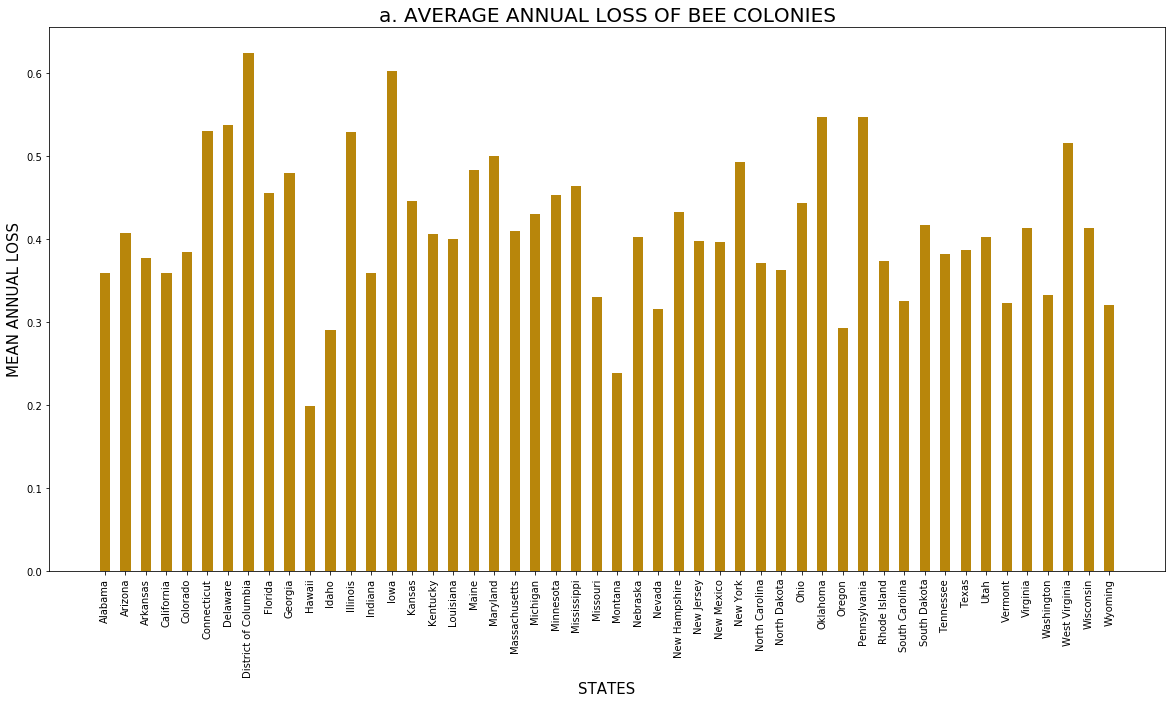

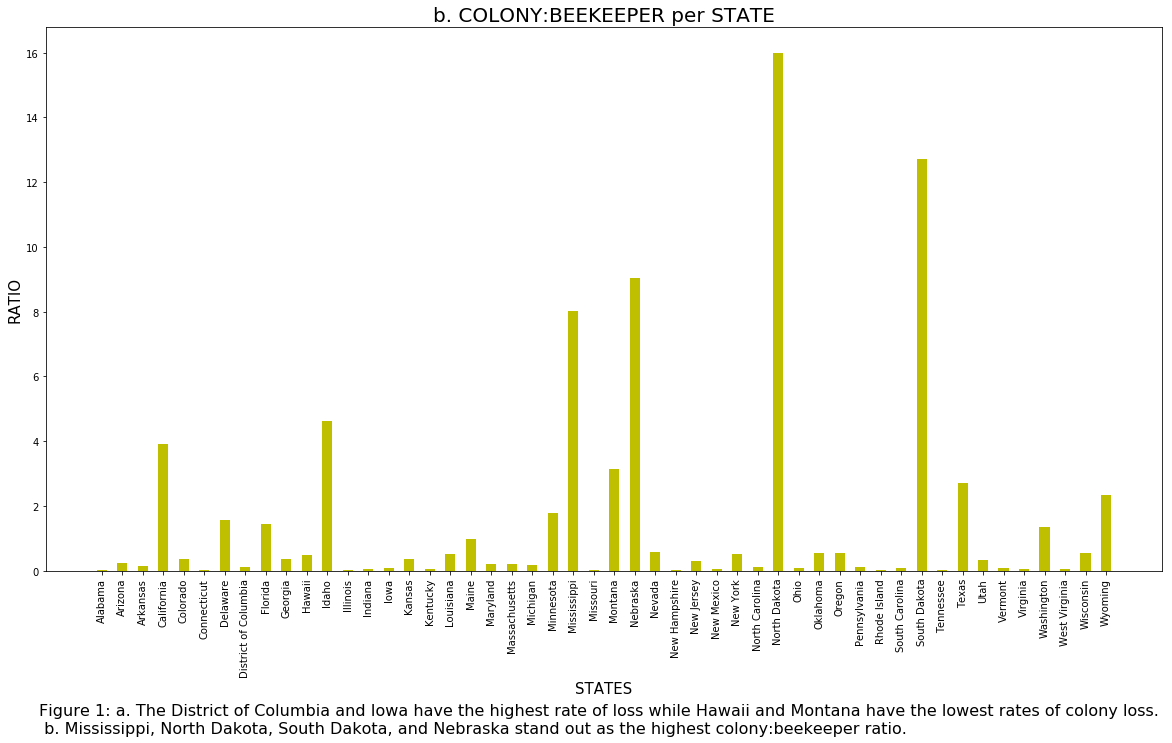

In [4]:
st=df2['STATE'] 
loss=df2['TOTAL_ANN_LOSS']

plt.figure(figsize=(20, 10))

plt.bar(st, loss, align='center', alpha=1, color='darkgoldenrod', width=0.5)
plt.xticks(rotation=90)
plt.xlabel('STATES', size=15)
plt.ylabel('MEAN ANNUAL LOSS', size=15)
plt.title('a. AVERAGE ANNUAL LOSS OF BEE COLONIES', size=20)


###Normalizing/Scaling data
st=df2['STATE']
col=df2['COLONIES']
bk=df2['BEEKEEPERS']

col_norm=preprocessing.normalize([col])[0]
bk_norm=preprocessing.normalize([bk])[0]
ratio_st=(col_norm/bk_norm)

popmean=np.mean(df1['TOTAL_ANN_LOSS'])

plt.figure(figsize=(20, 10))
plt.bar(st, ratio_st, alpha=1, color='y', width=0.5)
plt.xticks(rotation=90)
plt.xlabel('STATES', size=15)
plt.ylabel('RATIO', size=15)
plt.title('b. COLONY:BEEKEEPER per STATE', size=20)

##Add figure caption
txt="Figure 1: a. The District of Columbia and Iowa have the highest rate of loss while Hawaii and Montana have the lowest rates of colony loss.\n b. Mississippi, North Dakota, South Dakota, and Nebraska stand out as the highest colony:beekeeper ratio. "
plt.figtext(0.12, -.1, txt, wrap=False, horizontalalignment='left', fontsize=16)




Delving deeper to take a look at the average loss per year, we see that there is actually not a large difference between the six-year period. While 2014 showed the highest average loss, it is only a 0.008 difference from 2012 which also had a very high average loss. A standard deviation of 0.031 suggests that no outliers exist, and the spread is quite close. Analyzing figure 2, we can assume that the loss per year is not out of the ordinary, which may support the aforementioned study done in 2009 by vanEngelsdorp and Meixner that showed that colony loss is not an uncommon. We may be in a period of loss and this can only be shown with more data collected over the next few decades.

   YEAR  TOTAL_ANN_LOSS
0  2010        0.411064
1  2011        0.343404
2  2012        0.438980
3  2013        0.404600
4  2014        0.446939
5  2015        0.425000
6  2016        0.416800


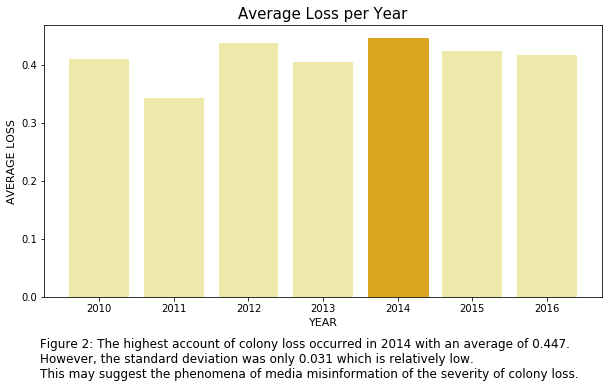

In [5]:
# Year with most loss
df_yr=df1.groupby('YEAR').mean()['TOTAL_ANN_LOSS'].reset_index()
yr_=df_yr['YEAR']
tal=df_yr['TOTAL_ANN_LOSS']
maxx=max(tal)

print(df_yr)

plt.figure(figsize=(10, 5))
b=plt.bar(yr_, tal, alpha=1, color='palegoldenrod')
b[4].set_color('goldenrod')
plt.xlabel('YEAR', size=11)
plt.ylabel('AVERAGE LOSS', size=11)
plt.title('Average Loss per Year', size=15)

##Add figure caption
txt='Figure 2: The highest account of colony loss occurred in 2014 with an average of 0.447.\n However, the standard deviation was only 0.031 which is relatively low. \n This may suggest the phenomena of media misinformation of the severity of colony loss.'
plt.figtext(0.12, -.1, txt, wrap=True, horizontalalignment='left', fontsize=12)

plt.show()

However, now looking at the colony to beekeeper ratio per year, there seems to be a significant rise in 2012. Normalizing the number of colonies and the number of beekeepers, we can assume that a 1:1 ratio or ~50% would indicate 1 colony per beekeeper, similar to what was done above for the state data. This suggests that in 2012, the number of colonies either increased significantly, or the number of beekeepers decreased. The data shows that the number of colonies significantly increased, while the number of beekeepers also increased, but at a much lower rate. This finding contradicts a 2012 [report](https://beeinformed.org/results/winter-loss-survey-2012-2013-2/) that claims 31% of bee colonies died out that year. However, this dataset does not include size of colonies or health of colonies which may bias the data.

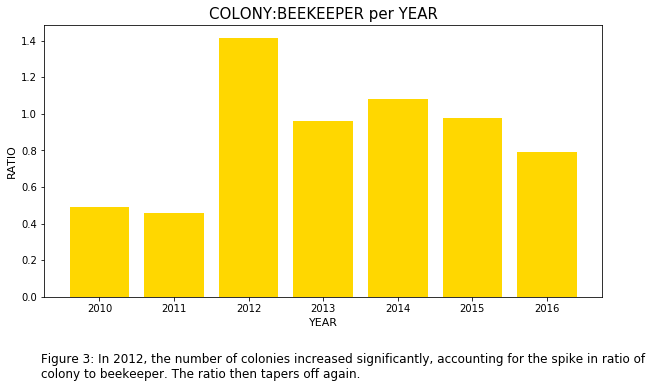

   YEAR      COLONIES  BEEKEEPERS
0  2010   9436.692308   49.230769
1  2011  11002.529412   61.784314
2  2012  47052.392157   85.607843
3  2013  44142.843137  118.019608
4  2014  41059.607843   97.941176
5  2015  35287.326923   92.942308
6  2016  25894.840000   83.960000


In [6]:
#groupby year
df_yr2=df1.groupby('YEAR').mean()[['COLONIES','BEEKEEPERS']].reset_index()
yr=np.unique(df_yr2['YEAR'])

st=df2['STATE']
col_yr=df_yr2['COLONIES']
bk_yr=df_yr2['BEEKEEPERS']

norm_colyr=preprocessing.normalize([col_yr])[0]
norm_bkyr=preprocessing.normalize([bk_yr])[0]
ratio_yr=(norm_colyr)/(norm_bkyr)

plt.figure(figsize=(10, 5))
plt.bar(yr, ratio_yr, color='gold')
plt.xlabel('YEAR', size=11)
plt.ylabel('RATIO', size=11)
plt.title('COLONY:BEEKEEPER per YEAR', size=15)

##Add figure caption
txt='Figure 3: In 2012, the number of colonies increased significantly, accounting for the spike in ratio of \n colony to beekeeper. The ratio then tapers off again.'
plt.figtext(0.12, -.1, txt, wrap=True, horizontalalignment='left', fontsize=12)

plt.show()

print(df_yr2)

In order to see which states were affected by loss from 2011 to 2012, we can look at a snapshot of 2011 compared to 2012. There seems to be an overall increase in loss in all states; however, the states on the east coast seem to be most significantly affected. This could be due to the harsher winters, as colonies tend to have a difficult time recovering after a long or extremely cold winter (Genersch et al 2010). 

/Users/hhc/anaconda3/envs/venv1/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/hhc/anaconda3/envs/venv1/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



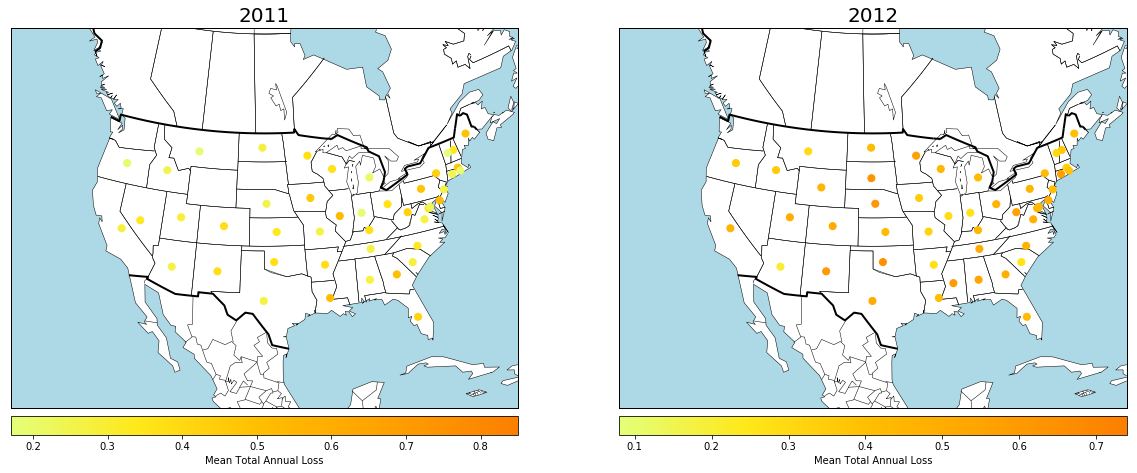

In [10]:
from __future__ import (absolute_import, division, print_function)

#DF with only data from 2010 -- sorted alphabetically
new_df=pd.merge(df, maps, on='STATE')
_2011=new_df[['STATE', 'TOTAL_ANN_LOSS','YEAR','Longitude','Latitude']].dropna().sort_values(by='STATE')
_2011=_2011[new_df.YEAR == 2011]

#DF with only data from 2016 -- sorted alphabetically
new_df=pd.merge(df, maps, on='STATE')
_2012=new_df[['STATE', 'TOTAL_ANN_LOSS','YEAR','Longitude','Latitude']].dropna().sort_values(by='STATE')
_2012=_2012[new_df.YEAR == 2012]

##convert lon and lat to values
lon=_2011['Longitude'].values
lat=_2011['Latitude'].values
lo=_2011['TOTAL_ANN_LOSS'].values
lon2=_2012['Longitude'].values
lat2=_2012['Latitude'].values
lo2=_2012['TOTAL_ANN_LOSS'].values

#USA Map
fig = plt.figure(figsize=(20, 15))

ax = fig.add_subplot(121)
ax.set_title("2011",fontsize=20)
m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='white')
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid') 
m.drawstates(linewidth=0.5, linestyle='solid')
m.scatter(lon, lat, latlon=True, c=lo, s=50, cmap='Wistia', alpha=1, zorder=10)
m.colorbar(location='bottom', label='Mean Total Annual Loss')

ax = fig.add_subplot(122)
ax.set_title("2012", fontsize=20)
m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='white')
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid') 
m.drawstates(linewidth=0.5, linestyle='solid')
m.scatter(lon2, lat2, latlon=True, c=lo2, s=50, cmap='Wistia', alpha=1, zorder=10)
m.colorbar(location='bottom', label='Mean Total Annual Loss')

plt.show()

With this brief analysis, we see that the number of beekeepers is not fully correlated with number of colonies. This relationship between bee colony and beekeeper is dependent on the state and whether it produces honey as a commercial good. The overall data in the six-year period seems to support the claim that colony loss is not uncommon. With continual problems in bee health, such as mites, pesticides, and other diseases, CCD should not be reported as a rare phenomenon that has suddenly occurred. This data set also does not include recovery rate, meaning information on whether the colony recovers after its annual decline. While ~40% may be lost over the year, do the colonies recover fully? And if they do, that would mean that the next year's ~40% loss is not significant. Therefore, a more comprehensive look at colony loss over a longer period of time, for example 50 years, would help distinguish more detailed relationships between beekeeper and bee colonies in the United States. 

### References

   BAILEY, L (2002) The Isle of Wight Disease. Central Association of Bee-Keepers; Poole, UK. 11 pp.


   BAILEY, L; BALL, B V (1991) Honey bee pathology. Academic Press; London, UK. 193 pp.


   ELLIS, J D; EVANS, J D; PETTIS J S (2010). Colony losses, managed colony population decline and Colony Collapse Disorder in the United States. Journal of Apicultural Research 49(1): 134-136.DOI: 10.3896/IBRA.1.49.1.30


   GENERSCH, E., WON DER OHE, W., KAATZ, H., SCHROEDER, A., OTTEN, C., BüCHLER, R., ... & MEIXNER, M. (2010). The German bee monitoring project: a long term study to understand periodically high winter losses of honey bee colonies. Apidologie, 41(3), 332-352.


   MORSE R A, CALDERONE N W (2000). The value of honey bees as pollinators of U.S. crops in 2000. Bee Culture 128: 1–15.


   NEUMANN, P & CARRECK, N L (2010). Honey bee colony losses, Journal of Apicultural Research, 49:1, 1-6, DOI: 10.3896/IBRA.1.49.1.01: 2078-6913


   POTTS, S G; ROBERTS, S P M; DEAN, R; MARRIS, G; BROWN, M A; JONES, H R; NEUMANN, P; SETTELE, J (2010) Declines of managed honey bees and beekeepers in Europe. Journal of Apicultural Research 49(1): 15-22. DOI:10.3896/IBRA.1.49.1.02


   VANENGELSDORP, D; MEIXNER, M D (2009) A historical review of managed honey bee populations in Europe and the United States and the factors that may affect them. Journal of Invertebrate Pathology (in press). DOI 10.1016/j.jip.2009.06.011 VEJSNÆS, F; KRYGER, P (2010). Factors involved in the recent